# Importing libraries

In [14]:
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions

# Reading the training data

In [17]:
file_path = r"C:\Users\itsam\OneDrive\Desktop\Flight-Prediction\Data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-15,Delhi,Cochin,22:00:00,19:15:00,1275,2.0,No Info,11281
1,Jet Airways,2019-03-01,Banglore,New Delhi,16:55:00,08:15:00,920,1.0,No Info,26890
2,Indigo,2019-03-24,Banglore,New Delhi,13:00:00,15:50:00,170,0.0,No Info,8033
3,Air India,2019-04-21,Kolkata,Banglore,20:45:00,23:20:00,155,0.0,No Info,4880
4,Jet Airways,2019-05-24,Kolkata,Banglore,20:00:00,20:45:00,1485,1.0,In-flight meal not included,10844
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-05-21,Delhi,Cochin,22:50:00,04:25:00,335,1.0,No Info,16079
636,Air Asia,2019-05-09,Kolkata,Banglore,07:35:00,23:30:00,955,1.0,No Info,5192
637,Indigo,2019-03-18,Mumbai,Hyderabad,20:05:00,21:35:00,90,0.0,No Info,2227
638,Multiple Carriers,2019-03-09,Delhi,Cochin,17:00:00,01:35:00,515,1.0,No Info,14343


In [18]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [26]:
train = train.assign(**{
    col: pd.to_datetime(train[col], dayfirst=True)
    for col in ['date_of_journey', 'dep_time', 'arrival_time']
})

In [27]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [28]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-15,Delhi,Cochin,2026-02-15 22:00:00,2026-02-15 19:15:00,1275,2.0,No Info,11281
1,Jet Airways,2019-03-01,Banglore,New Delhi,2026-02-15 16:55:00,2026-02-15 08:15:00,920,1.0,No Info,26890
2,Indigo,2019-03-24,Banglore,New Delhi,2026-02-15 13:00:00,2026-02-15 15:50:00,170,0.0,No Info,8033
3,Air India,2019-04-21,Kolkata,Banglore,2026-02-15 20:45:00,2026-02-15 23:20:00,155,0.0,No Info,4880
4,Jet Airways,2019-05-24,Kolkata,Banglore,2026-02-15 20:00:00,2026-02-15 20:45:00,1485,1.0,In-flight meal not included,10844
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-05-21,Delhi,Cochin,2026-02-15 22:50:00,2026-02-15 04:25:00,335,1.0,No Info,16079
636,Air Asia,2019-05-09,Kolkata,Banglore,2026-02-15 07:35:00,2026-02-15 23:30:00,955,1.0,No Info,5192
637,Indigo,2019-03-18,Mumbai,Hyderabad,2026-02-15 20:05:00,2026-02-15 21:35:00,90,0.0,No Info,2227
638,Multiple Carriers,2019-03-09,Delhi,Cochin,2026-02-15 17:00:00,2026-02-15 01:35:00,515,1.0,No Info,14343


## 3. Summary of Data

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [31]:
train.describe(include ="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,615.601562,0.796875,8837.242188
std,490.579953,0.680138,4712.353909
min,80.000000,0.000000,1965.000000
25%,170.000000,0.000000,4925.750000
50%,507.500000,1.000000,8029.000000
75%,911.250000,1.000000,12026.750000
max,2295.000000,3.000000,54826.000000


In [32]:
train.describe(include='O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No Info
freq,226,267,267,494


## Analysis of Missing Values

In [33]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


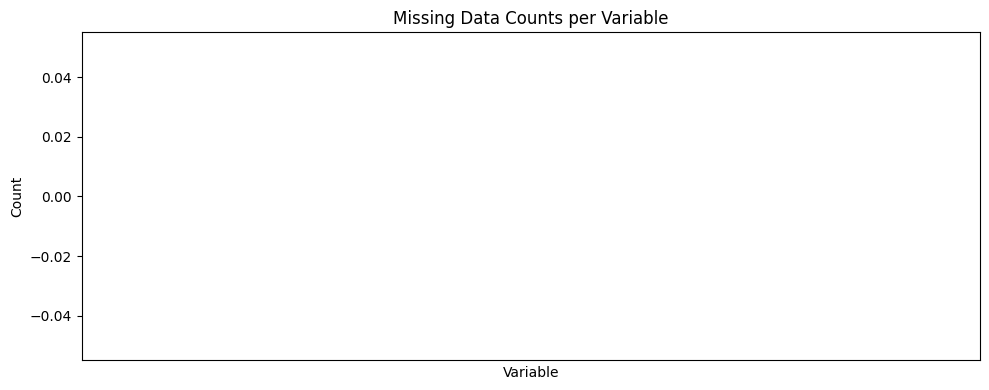

In [34]:
eda_helper_functions.plot_missing_info(train)

- There is no missing values

## Analysis of Outliers

In [36]:
from sklearn.ensemble  import IsolationForest

In [37]:
forest = IsolationForest(n_estimators=10 , random_state=42)

In [42]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns='price')
                                         .select_dtypes(include='number')))
    .query('outlier == -1')
#     .duration
#     .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-05-15,Delhi,Cochin,2026-02-15 22:00:00,2026-02-15 19:15:00,1275,2.0,No Info,11281,-1
4,Jet Airways,2019-05-24,Kolkata,Banglore,2026-02-15 20:00:00,2026-02-15 20:45:00,1485,1.0,In-flight meal not included,10844,-1
5,Spicejet,2019-06-06,Kolkata,Banglore,2026-02-15 09:00:00,2026-02-15 11:25:00,145,0.0,No Info,3873,-1
7,Jet Airways,2019-05-18,Kolkata,Banglore,2026-02-15 08:25:00,2026-02-15 08:15:00,1430,1.0,In-flight meal not included,9663,-1
10,Jet Airways,2019-05-09,Delhi,Cochin,2026-02-15 23:05:00,2026-02-15 12:35:00,810,2.0,No Info,15129,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-03-06,Banglore,New Delhi,2026-02-15 14:05:00,2026-02-15 09:30:00,1165,1.0,No Info,17261,-1
628,Air India,2019-05-12,Kolkata,Banglore,2026-02-15 09:50:00,2026-02-15 23:15:00,805,3.0,No Info,14015,-1
629,Air India,2019-03-27,Delhi,Cochin,2026-02-15 21:30:00,2026-02-15 19:15:00,1305,2.0,No Info,8665,-1
630,Jet Airways,2019-06-03,Delhi,Cochin,2026-02-15 09:40:00,2026-02-15 12:35:00,1615,2.0,In-flight meal not included,10368,-1


## Pair Plots

- lower half and upper half have same graph , so we are just seeing unique one

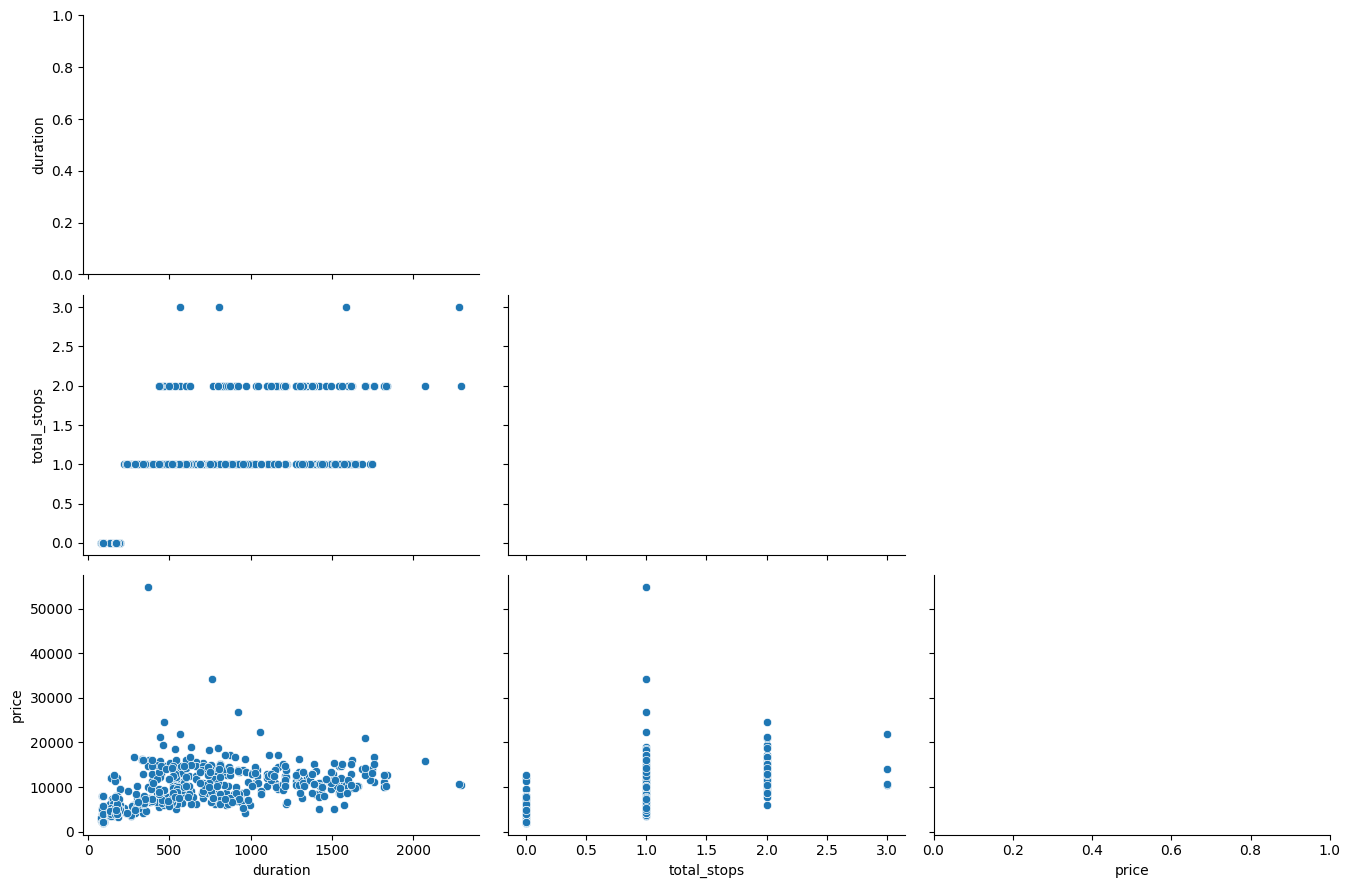

In [63]:
pp = sns.PairGrid(train , height =3 , aspect= 1.5 , hue = None , corner = True)
pp.map_lower(sns.scatterplot)
# pairplot me diagonal show hoga , but pair grid me nahii

## Correlation analysis

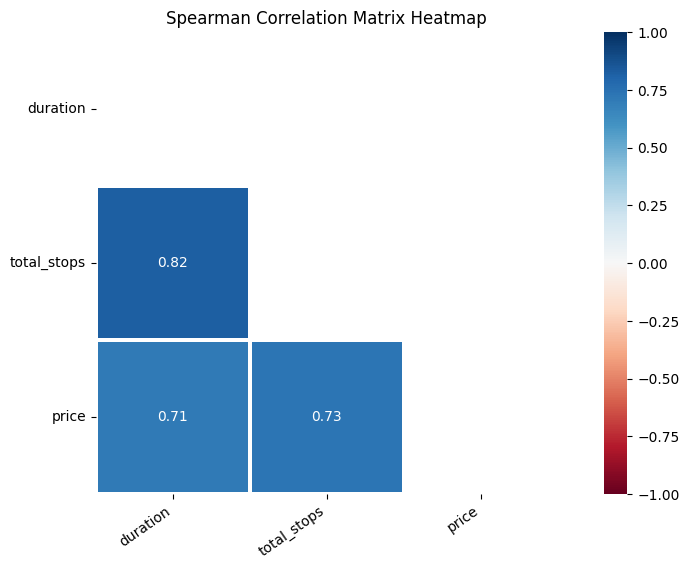

In [64]:
eda_helper_functions.correlation_heatmap(train)

In [67]:
train.corr(method='spearman', numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.823854,0.710347
total_stops,0.823854,1.000000,0.728443
price,0.710347,0.728443,1.000000


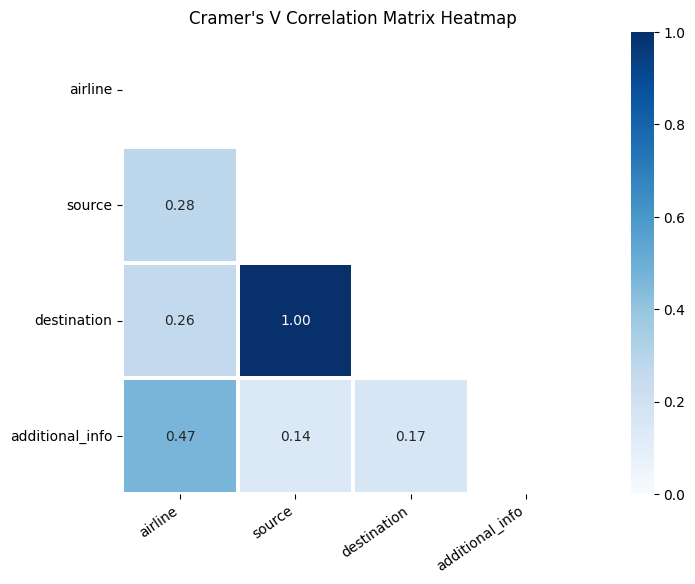

In [68]:
eda_helper_functions.cramersV_heatmap(train)